<a href="https://colab.research.google.com/github/Sachinshil/Machine_learning/blob/main/spam_ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- Importing Libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import re
import yellowbrick
import pickle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import nltk
import random
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/pt/pt.csv')
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


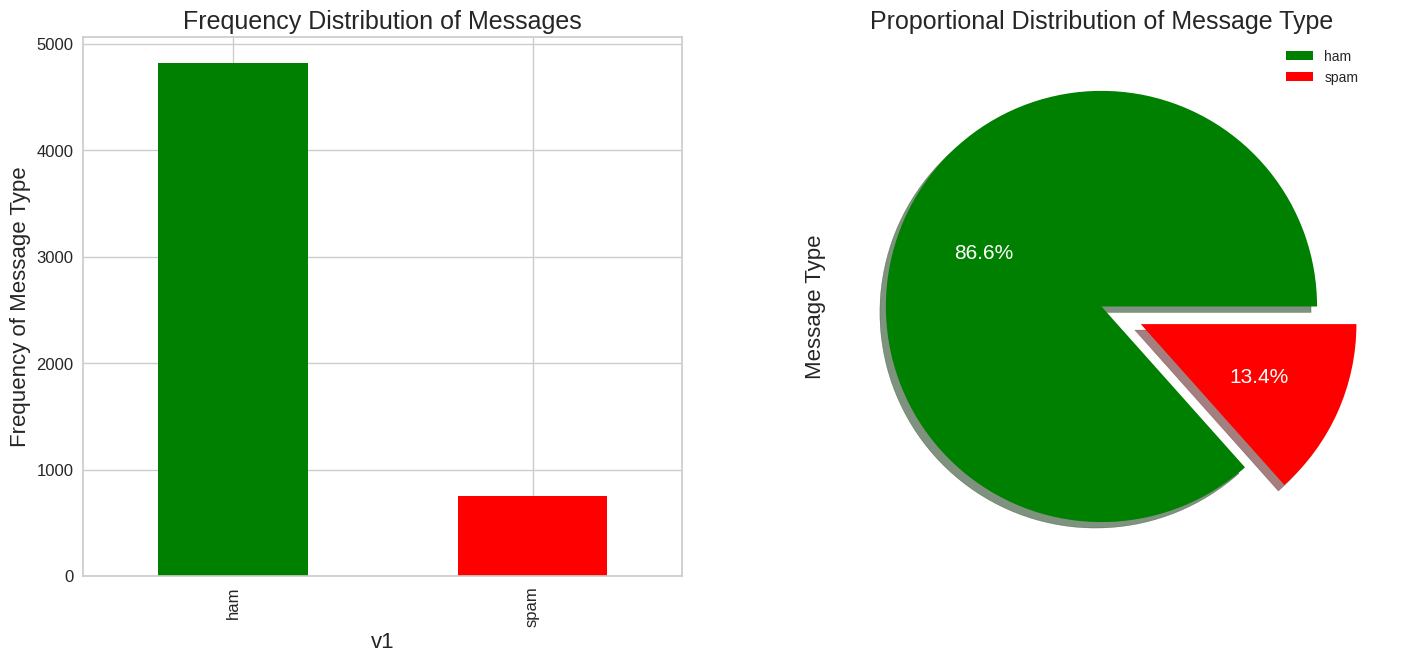

In [ ]:
plt.figure(figsize=(17, 7))

plt.subplot(1, 2, 1)

df.v1.value_counts().plot(kind = 'bar', color = ['green', 'red'])

plt.xlabel('v1', fontsize=16)
plt.ylabel('Frequency of Message Type', fontsize=16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Frequency Distribution of Messages', fontsize=18)


plt.subplot(1,2,2)

df.v1.value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True, colors = ['green','red'],
                                  textprops={'fontsize':15, 'color':'white'})
plt.ylabel('Message Type', fontsize=16)
plt.title('Proportional Distribution of Message Type', fontsize=18)
plt.legend()

In [ ]:
df['v1'] = df['v1'].replace(['ham','spam'],[0,1])
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df['v1'].value_counts()

0    4825
1     747
Name: v1, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   int64 
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(4)
memory usage: 217.8+ KB


In [ ]:
# Storing in "before_process" a random example of review before preprocessing
# Defining and applying the function "process" performing the transformations of the reviews
# Storing in "after_process" the example of review after preprocessing
import random
import re
idx = random.randint(0, len(df)-1)
before_process = df.iloc[idx][0]

def process(x):
    x = re.sub('[,\.!?:()"]', '', x) # It removes all punctuation marks such as ",", ".", "!", "?", ":" and "()"
    x = re.sub('<.*?>', ' ', x) # It removes all the HTML tags using <.*?>
    x = re.sub('http\S+', ' ', x) # It removes all the URLs using http\S+
    x = re.sub('[^a-zA-Z0-9]', ' ', x) # It removes all the special characters using [^a-zA-Z0-9]
    x = re.sub('\s+', ' ', x) # Eliminate duplicate whitespaces using wildcards
    return x.lower().strip()

df['v2'] = df['v2'].apply(lambda x: process(x))
after_process = df.iloc[idx][0]

In [ ]:
# 2: Pre-processing: removing stop words.

import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Create tokenizer and stopwords
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Pre-processing the training set
processed_data = []
for sentence in df['v2']:
    words = tokenizer.tokenize(sentence.lower())
    words = [word for word in words if word not in stop_words]
    processed_data.append(words)

In [ ]:
# 3: Analysing the feature of the training set, report the linguistic features of the training dataset.

import collections

# Create a dictionary to count the frequency of each word
word_frequency = collections.defaultdict(int)
for sentence in processed_data:
    for word in sentence:
        word_frequency[word] += 1

# Calculate the average length of the sentences
sentence_lengths = []
for sentence in processed_data:
    sentence_lengths.append(len(sentence))
average_sentence_length = sum(sentence_lengths) / len(sentence_lengths)


# Report the linguistic features
print("The average sentence length is", average_sentence_length)
print("The most common words are:")
for word, frequency in sorted(word_frequency.items(), key=lambda item: item[1], reverse=True)[:10]:
    print(word, frequency)

The average sentence length is 9.291636755204594
The most common words are:
u 1161
call 583
2 495
get 388
ur 384
gt 318
lt 316
4 298
free 283
go 278


In [ ]:
X=df.v2.values
y=df.v1.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer

# Create a vectorizer and train the model
vectorizer = TfidfVectorizer(min_df=2)
X_train = vectorizer.fit_transform(X_train)
y_train = y_train
X_test = vectorizer.transform(X_test)
y_test = y_test


In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_preds = dtc.predict(X_test)
dtc_auc = roc_auc_score(y_test, dtc_preds)

# Train the Gradient Boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_preds = gbc.predict(X_test)
gbc_auc = roc_auc_score(y_test, gbc_preds)

# Train the Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)
rfc_auc = roc_auc_score(y_test, rfc_preds)


# Evaluate the models
models = ['Decision Tree', 'Gradient Boosting', 'Random Forest']
accuracy_scores = [accuracy_score(y_test, dtc_preds), accuracy_score(y_test, gbc_preds), accuracy_score(y_test, rfc_preds)]
precision_scores = [precision_score(y_test, dtc_preds), precision_score(y_test, gbc_preds), precision_score(y_test, rfc_preds)]
recall_scores = [recall_score(y_test, dtc_preds), recall_score(y_test, gbc_preds), recall_score(y_test, rfc_preds)]
f1_scores = [f1_score(y_test, dtc_preds), f1_score(y_test, gbc_preds), f1_score(y_test, rfc_preds)]
roc_auc_scores = [dtc_auc, gbc_auc, rfc_auc]

# Create a table to display the results
results = pd.DataFrame({'Model': models,
                        'Accuracy Score': accuracy_scores,
                        'Precision Score': precision_scores,
                        'Recall Score': recall_scores,
                        'F1 Score': f1_scores,
                        'ROC AUC Score': roc_auc_scores})
display(results)

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC AUC Score
0,Decision Tree,0.964126,0.904412,0.820000,0.860140,0.903264
1,Gradient Boosting,0.972197,1.000000,0.793333,0.884758,0.896667
2,Random Forest,0.977578,1.000000,0.833333,0.909091,0.916667


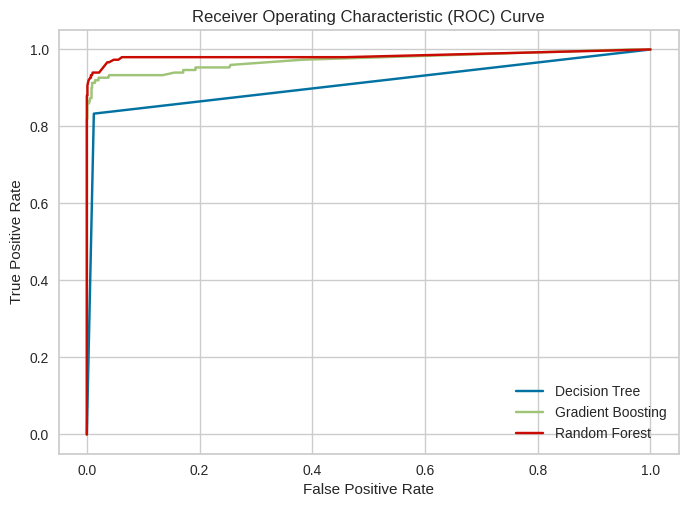

In [ ]:
# Train the Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_preds = dtc.predict(X_test)
dtc_proba = dtc.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, dtc_proba)

# Train the Gradient Boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_preds = gbc.predict(X_test)
gbc_proba = gbc.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, gbc_proba)

# Train the Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc_proba)

# Plot the ROC curves
plt.plot(fpr_dtc, tpr_dtc, label='Decision Tree')
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boosting')
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set for the Decision Tree classifier
dtc_preds = dtc.predict(X_test)

# Create a confusion matrix for the Decision Tree classifier
dtc_cm = confusion_matrix(y_test, dtc_preds)


# Make predictions on the test set for the Gradient Boosting classifier
gbc_preds = gbc.predict(X_test)

# Create a confusion matrix for the Gradient Boosting classifier
gbc_cm = confusion_matrix(y_test, gbc_preds)

# Make predictions on the test set for the Random Forest classifier
rfc_preds = rfc.predict(X_test)

# Create a confusion matrix for the Random Forest classifier
rfc_cm = confusion_matrix(y_test, rfc_preds)

# Print the confusion matrices
print('Decision Tree Confusion Matrix:')
print(dtc_cm)

print('Gradient Boosting Confusion Matrix:')
print(gbc_cm)

print('Random Forest Confusion Matrix:')
print(rfc_cm)


Decision Tree Confusion Matrix:
[[874  91]
 [ 15 135]]
Gradient Boosting Confusion Matrix:
[[946  19]
 [ 19 131]]
Random Forest Confusion Matrix:
[[950  15]
 [ 12 138]]


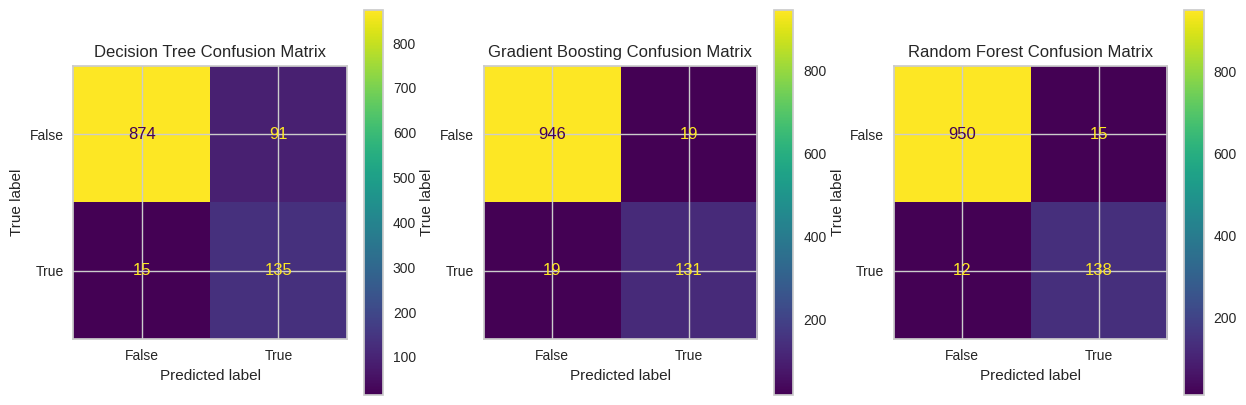

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Assuming you have already trained and defined the Decision Tree, Gradient Boosting, and Random Forest classifiers
# dtc = DecisionTreeClassifier()
# gbc = GradientBoostingClassifier()
# rfc = RandomForestClassifier()

# Make predictions on the test set for the Decision Tree classifier
dtc_preds = dtc.predict(X_test)

# Create a confusion matrix for the Decision Tree classifier
dtc_cm = confusion_matrix(y_test, dtc_preds)

# Make predictions on the test set for the Gradient Boosting classifier
gbc_preds = gbc.predict(X_test)

# Create a confusion matrix for the Gradient Boosting classifier
gbc_cm = confusion_matrix(y_test, gbc_preds)

# Make predictions on the test set for the Random Forest classifier
rfc_preds = rfc.predict(X_test)

# Create a confusion matrix for the Random Forest classifier
rfc_cm = confusion_matrix(y_test, rfc_preds)

# Create ConfusionMatrixDisplay objects for each classifier
dtc_cm_display = ConfusionMatrixDisplay(confusion_matrix=dtc_cm, display_labels=[False, True])
gbc_cm_display = ConfusionMatrixDisplay(confusion_matrix=gbc_cm, display_labels=[False, True])
rfc_cm_display = ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=[False, True])

# Plot the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].set_title('Decision Tree Confusion Matrix')
axes[1].set_title('Gradient Boosting Confusion Matrix')
axes[2].set_title('Random Forest Confusion Matrix')

dtc_cm_display.plot(ax=axes[0], cmap='viridis')
gbc_cm_display.plot(ax=axes[1], cmap='viridis')
rfc_cm_display.plot(ax=axes[2], cmap='viridis')

plt.show()


In [ ]:
dtc_preds = dtc.predict(X_test)
gbc_preds = gbc.predict(X_test)
rfc_preds = rfc.predict(X_test)
# Calculate validation accuracy for each model
gb_val_acc = accuracy_score(y_test, gbc_preds)
dt_val_acc = accuracy_score(y_test, dtc_preds)
rf_val_acc = accuracy_score(y_test, rfc_preds)

# Print validation accuracy for each model
print('Gradient Boosting Validation Accuracy:', gb_val_acc)
print('Decision Tree Validation Accuracy:', dt_val_acc)
print('Random Forest Validation Accuracy:', rf_val_acc)

Gradient Boosting Validation Accuracy: 0.9730941704035875
Decision Tree Validation Accuracy: 0.9668161434977578
Random Forest Validation Accuracy: 0.9766816143497757


oversampling suru

In [ ]:
from imblearn import under_sampling,over_sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled,y_resampled = ros.fit_resample(X_train,y_train)


In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_resampled, y_resampled)
dtc_preds = dtc.predict(X_test)
dtc_auc = roc_auc_score(y_test, dtc_preds)

# Train the Gradient Boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_resampled, y_resampled)
gbc_preds = gbc.predict(X_test)
gbc_auc = roc_auc_score(y_test, gbc_preds)

# Train the Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_resampled, y_resampled)
rfc_preds = rfc.predict(X_test)
rfc_auc = roc_auc_score(y_test, rfc_preds)


# Evaluate the models
models = ['Decision Tree', 'Gradient Boosting', 'Random Forest']
accuracy_scores = [accuracy_score(y_test, dtc_preds), accuracy_score(y_test, gbc_preds), accuracy_score(y_test, rfc_preds)]
precision_scores = [precision_score(y_test, dtc_preds), precision_score(y_test, gbc_preds), precision_score(y_test, rfc_preds)]
recall_scores = [recall_score(y_test, dtc_preds), recall_score(y_test, gbc_preds), recall_score(y_test, rfc_preds)]
f1_scores = [f1_score(y_test, dtc_preds), f1_score(y_test, gbc_preds), f1_score(y_test, rfc_preds)]
roc_auc_scores = [dtc_auc, gbc_auc, rfc_auc]

# Create a table to display the results
results = pd.DataFrame({'Model': models,
                        'Accuracy Score': accuracy_scores,
                        'Precision Score': precision_scores,
                        'Recall Score': recall_scores,
                        'F1 Score': f1_scores,
                        'ROC AUC Score': roc_auc_scores})
display(results)

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC AUC Score
0,Decision Tree,0.962332,0.850649,0.873333,0.861842,0.924750
1,Gradient Boosting,0.973991,0.923077,0.880000,0.901024,0.934301
2,Random Forest,0.981166,1.000000,0.860000,0.924731,0.930000


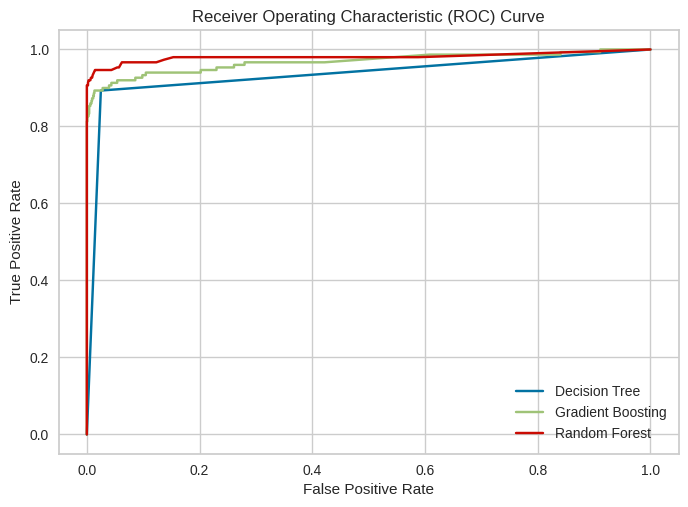

In [ ]:
# Train the Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_resampled, y_resampled)
dtc_preds = dtc.predict(X_test)
dtc_proba = dtc.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, dtc_proba)

# Train the Gradient Boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_resampled, y_resampled)
gbc_preds = gbc.predict(X_test)
gbc_proba = gbc.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, gbc_proba)

# Train the Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_resampled, y_resampled)
rfc_preds = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc_proba)

# Plot the ROC curves
plt.plot(fpr_dtc, tpr_dtc, label='Decision Tree')
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boosting')
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set for the Decision Tree classifier
dtc_preds = dtc.predict(X_test)

# Create a confusion matrix for the Decision Tree classifier
dtc_cm = confusion_matrix(y_test, dtc_preds)

# Make predictions on the test set for the Gradient Boosting classifier
gbc_preds = gbc.predict(X_test)

# Create a confusion matrix for the Gradient Boosting classifier
gbc_cm = confusion_matrix(y_test, gbc_preds)

# Make predictions on the test set for the Random Forest classifier
rfc_preds = rfc.predict(X_test)

# Create a confusion matrix for the Random Forest classifier
rfc_cm = confusion_matrix(y_test, rfc_preds)

# Print the confusion matrices
print('Decision Tree Confusion Matrix:')
print(dtc_cm)

print('Gradient Boosting Confusion Matrix:')
print(gbc_cm)

print('Random Forest Confusion Matrix:')
print(rfc_cm)

Decision Tree Confusion Matrix:
[[941  24]
 [ 16 134]]
Gradient Boosting Confusion Matrix:
[[954  11]
 [ 18 132]]
Random Forest Confusion Matrix:
[[965   0]
 [ 22 128]]


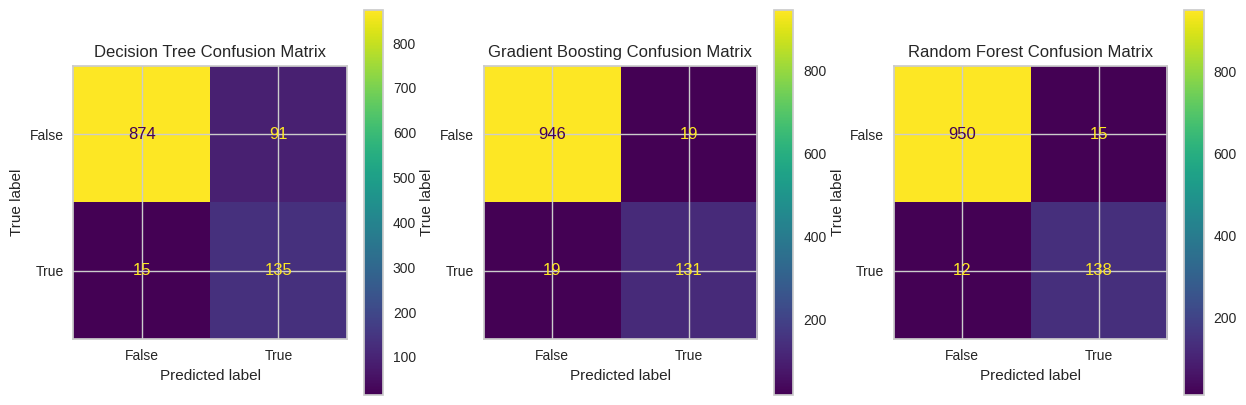

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Assuming you have already trained and defined the Decision Tree, Gradient Boosting, and Random Forest classifiers
# dtc = DecisionTreeClassifier()
# gbc = GradientBoostingClassifier()
# rfc = RandomForestClassifier()

# Make predictions on the test set for the Decision Tree classifier
dtc_preds = dtc.predict(X_test)

# Create a confusion matrix for the Decision Tree classifier
dtc_cm = confusion_matrix(y_test, dtc_preds)

# Make predictions on the test set for the Gradient Boosting classifier
gbc_preds = gbc.predict(X_test)

# Create a confusion matrix for the Gradient Boosting classifier
gbc_cm = confusion_matrix(y_test, gbc_preds)

# Make predictions on the test set for the Random Forest classifier
rfc_preds = rfc.predict(X_test)

# Create a confusion matrix for the Random Forest classifier
rfc_cm = confusion_matrix(y_test, rfc_preds)

# Create ConfusionMatrixDisplay objects for each classifier
dtc_cm_display = ConfusionMatrixDisplay(confusion_matrix=dtc_cm, display_labels=[False, True])
gbc_cm_display = ConfusionMatrixDisplay(confusion_matrix=gbc_cm, display_labels=[False, True])
rfc_cm_display = ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=[False, True])

# Plot the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].set_title('Decision Tree Confusion Matrix')
axes[1].set_title('Gradient Boosting Confusion Matrix')
axes[2].set_title('Random Forest Confusion Matrix')

dtc_cm_display.plot(ax=axes[0], cmap='viridis')
gbc_cm_display.plot(ax=axes[1], cmap='viridis')
rfc_cm_display.plot(ax=axes[2], cmap='viridis')

plt.show()


In [ ]:
dtc_preds = dtc.predict(X_test)
gbc_preds = gbc.predict(X_test)
rfc_preds = rfc.predict(X_test)
# Calculate validation accuracy for each model
gb_val_acc = accuracy_score(y_test, gbc_preds)
dt_val_acc = accuracy_score(y_test, dtc_preds)
rf_val_acc = accuracy_score(y_test, rfc_preds)

# Print validation accuracy for each model
print('Gradient Boosting Validation Accuracy:', gb_val_acc)
print('Decision Tree Validation Accuracy:', dt_val_acc)
print('Random Forest Validation Accuracy:', rf_val_acc)

Gradient Boosting Validation Accuracy: 0.9739910313901345
Decision Tree Validation Accuracy: 0.9641255605381166
Random Forest Validation Accuracy: 0.9802690582959641


undersampling suru

In [ ]:
A=df.v2.values
B=df.v1.values

In [ ]:
from sklearn.model_selection import train_test_split
A_train, X_test, B_train, y_test = train_test_split(A, B,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a vectorizer and train the model
vectorizer = TfidfVectorizer(min_df=2)
A_train = vectorizer.fit_transform(A_train)
B_train = B_train
X_test = vectorizer.transform(X_test)
y_test = y_test

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
A_resampled, B_resampled = rus.fit_resample(A_train, B_train)


In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(A_resampled, B_resampled)
dtc_preds = dtc.predict(X_test)
dtc_auc = roc_auc_score(y_test, dtc_preds)

# Train the Gradient Boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(A_resampled, B_resampled)
gbc_preds = gbc.predict(X_test)
gbc_auc = roc_auc_score(y_test, gbc_preds)

# Train the Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(A_resampled, B_resampled)
rfc_preds = rfc.predict(X_test)
rfc_auc = roc_auc_score(y_test, rfc_preds)


# Evaluate the models
models = ['Decision Tree', 'Gradient Boosting', 'Random Forest']
accuracy_scores = [accuracy_score(y_test, dtc_preds), accuracy_score(y_test, gbc_preds), accuracy_score(y_test, rfc_preds)]
precision_scores = [precision_score(y_test, dtc_preds), precision_score(y_test, gbc_preds), precision_score(y_test, rfc_preds)]
recall_scores = [recall_score(y_test, dtc_preds), recall_score(y_test, gbc_preds), recall_score(y_test, rfc_preds)]
f1_scores = [f1_score(y_test, dtc_preds), f1_score(y_test, gbc_preds), f1_score(y_test, rfc_preds)]
roc_auc_scores = [dtc_auc, gbc_auc, rfc_auc]

# Create a table to display the results
results = pd.DataFrame({'Model': models,
                        'Accuracy Score': accuracy_scores,
                        'Precision Score': precision_scores,
                        'Recall Score': recall_scores,
                        'F1 Score': f1_scores,
                        'ROC AUC Score': roc_auc_scores})
display(results)

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC AUC Score
0,Decision Tree,0.905830,0.600897,0.893333,0.718499,0.900553
1,Gradient Boosting,0.958744,0.829114,0.873333,0.850649,0.922677
2,Random Forest,0.977578,0.913907,0.920000,0.916944,0.953264


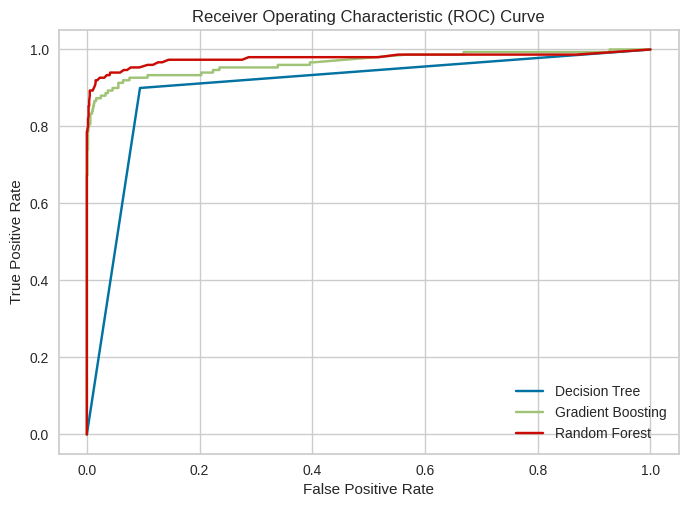

In [ ]:
# Train the Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(A_resampled, B_resampled)
dtc_preds = dtc.predict(X_test)
dtc_proba = dtc.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, dtc_proba)

# Train the Gradient Boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(A_resampled, B_resampled)
gbc_preds = gbc.predict(X_test)
gbc_proba = gbc.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, gbc_proba)

# Train the Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(A_resampled, B_resampled)
rfc_preds = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc_proba)

# Plot the ROC curves
plt.plot(fpr_dtc, tpr_dtc, label='Decision Tree')
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boosting')
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set for the Decision Tree classifier
dtc_preds = dtc.predict(X_test)

# Create a confusion matrix for the Decision Tree classifier
dtc_cm = confusion_matrix(y_test, dtc_preds)

# Make predictions on the test set for the Gradient Boosting classifier
gbc_preds = gbc.predict(X_test)

# Create a confusion matrix for the Gradient Boosting classifier
gbc_cm = confusion_matrix(y_test, gbc_preds)

# Make predictions on the test set for the Random Forest classifier
rfc_preds = rfc.predict(X_test)

# Create a confusion matrix for the Random Forest classifier
rfc_cm = confusion_matrix(y_test, rfc_preds)

# Print the confusion matrices
print('Decision Tree Confusion Matrix:')
print(dtc_cm)

print('Gradient Boosting Confusion Matrix:')
print(gbc_cm)

print('Random Forest Confusion Matrix:')
print(rfc_cm)

Decision Tree Confusion Matrix:
[[874  91]
 [ 15 135]]
Gradient Boosting Confusion Matrix:
[[946  19]
 [ 19 131]]
Random Forest Confusion Matrix:
[[950  15]
 [ 12 138]]


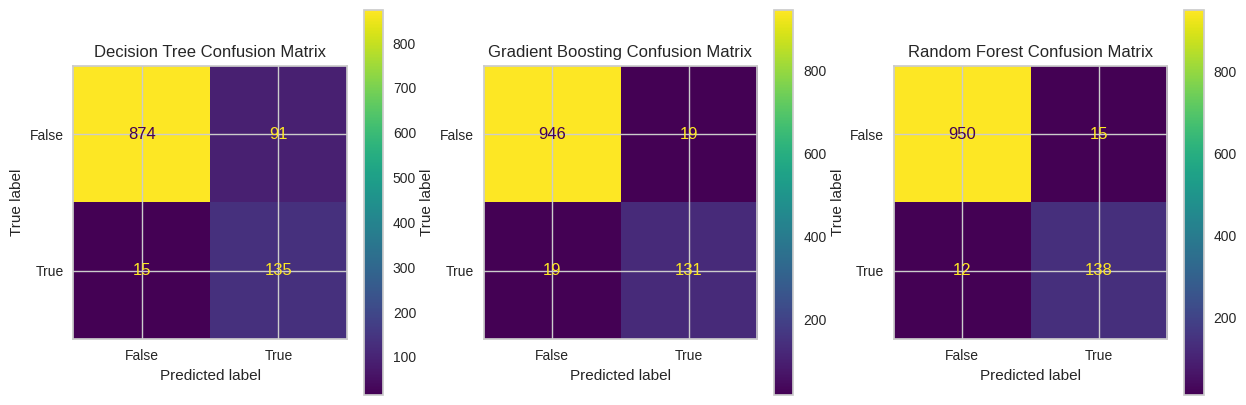

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Assuming you have already trained and defined the Decision Tree, Gradient Boosting, and Random Forest classifiers
# dtc = DecisionTreeClassifier()
# gbc = GradientBoostingClassifier()
# rfc = RandomForestClassifier()

# Make predictions on the test set for the Decision Tree classifier
dtc_preds = dtc.predict(X_test)

# Create a confusion matrix for the Decision Tree classifier
dtc_cm = confusion_matrix(y_test, dtc_preds)

# Make predictions on the test set for the Gradient Boosting classifier
gbc_preds = gbc.predict(X_test)

# Create a confusion matrix for the Gradient Boosting classifier
gbc_cm = confusion_matrix(y_test, gbc_preds)

# Make predictions on the test set for the Random Forest classifier
rfc_preds = rfc.predict(X_test)

# Create a confusion matrix for the Random Forest classifier
rfc_cm = confusion_matrix(y_test, rfc_preds)

# Create ConfusionMatrixDisplay objects for each classifier
dtc_cm_display = ConfusionMatrixDisplay(confusion_matrix=dtc_cm, display_labels=[False, True])
gbc_cm_display = ConfusionMatrixDisplay(confusion_matrix=gbc_cm, display_labels=[False, True])
rfc_cm_display = ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=[False, True])

# Plot the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].set_title('Decision Tree Confusion Matrix')
axes[1].set_title('Gradient Boosting Confusion Matrix')
axes[2].set_title('Random Forest Confusion Matrix')

dtc_cm_display.plot(ax=axes[0], cmap='viridis')
gbc_cm_display.plot(ax=axes[1], cmap='viridis')
rfc_cm_display.plot(ax=axes[2], cmap='viridis')

plt.show()


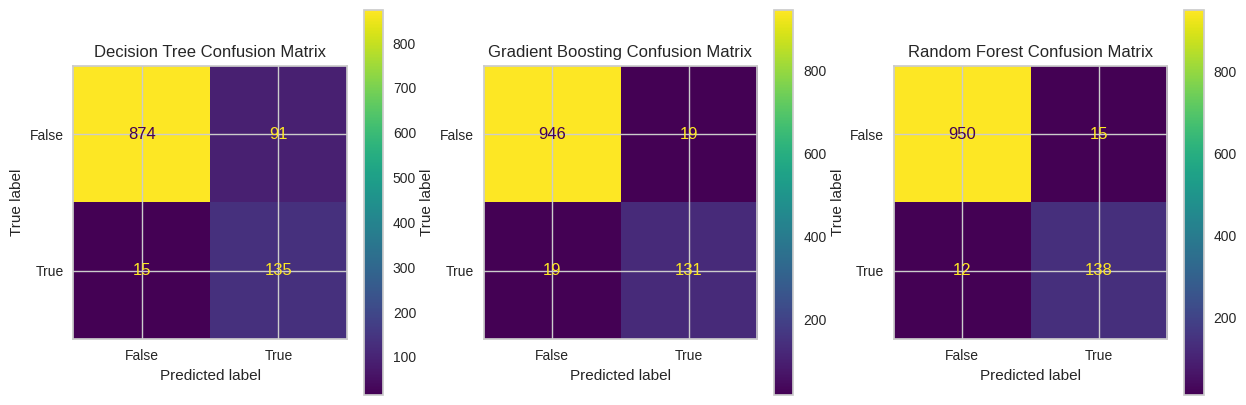

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Assuming you have already trained and defined the Decision Tree, Gradient Boosting, and Random Forest classifiers
# dtc = DecisionTreeClassifier()
# gbc = GradientBoostingClassifier()
# rfc = RandomForestClassifier()

# Make predictions on the test set for the Decision Tree classifier
dtc_preds = dtc.predict(X_test)

# Create a confusion matrix for the Decision Tree classifier
dtc_cm = confusion_matrix(y_test, dtc_preds)

# Make predictions on the test set for the Gradient Boosting classifier
gbc_preds = gbc.predict(X_test)

# Create a confusion matrix for the Gradient Boosting classifier
gbc_cm = confusion_matrix(y_test, gbc_preds)

# Make predictions on the test set for the Random Forest classifier
rfc_preds = rfc.predict(X_test)

# Create a confusion matrix for the Random Forest classifier
rfc_cm = confusion_matrix(y_test, rfc_preds)

# Create ConfusionMatrixDisplay objects for each classifier
dtc_cm_display = ConfusionMatrixDisplay(confusion_matrix=dtc_cm, display_labels=[False, True])
gbc_cm_display = ConfusionMatrixDisplay(confusion_matrix=gbc_cm, display_labels=[False, True])
rfc_cm_display = ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=[False, True])

# Plot the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].set_title('Decision Tree Confusion Matrix')
axes[1].set_title('Gradient Boosting Confusion Matrix')
axes[2].set_title('Random Forest Confusion Matrix')

dtc_cm_display.plot(ax=axes[0], cmap='viridis')
gbc_cm_display.plot(ax=axes[1], cmap='viridis')
rfc_cm_display.plot(ax=axes[2], cmap='viridis')

plt.show()



In [ ]:
dtc_preds = dtc.predict(X_test)
gbc_preds = gbc.predict(X_test)
rfc_preds = rfc.predict(X_test)
# Calculate validation accuracy for each model
gb_val_acc = accuracy_score(y_test, gbc_preds)
dt_val_acc = accuracy_score(y_test, dtc_preds)
rf_val_acc = accuracy_score(y_test, rfc_preds)

# Print validation accuracy for each model
print('Gradient Boosting Validation Accuracy:', gb_val_acc)
print('Decision Tree Validation Accuracy:', dt_val_acc)
print('Random Forest Validation Accuracy:', rf_val_acc)

Gradient Boosting Validation Accuracy: 0.9659192825112107
Decision Tree Validation Accuracy: 0.9049327354260089
Random Forest Validation Accuracy: 0.9757847533632287
